In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import sys
import os
dir_current = globals()['_dh'][0]
dir_repo = dir_current+'/../..'
dir_BinnedFit = dir_repo+"/BinnedFit"
dir_KLens = dir_repo+"/KLens"
dir_TNGcube = dir_repo+"/TNGcube"

sys.path.append(dir_KLens)
from KLtool import *

sys.path.append(dir_TNGcube)
from TNGcube import *

Populating the interactive namespace from numpy and matplotlib


# Subhalo
#### Stores the overall and particle information of an TNG subhalo, with methods to apply coordination transformation and shear.

In [3]:
subhalo = pickle.load(open('../notebooks/subhalo_46.pkl', 'rb'))

### properties

In [4]:
subhalo.info

{'snap': 75,
 'id': 46,
 'mass': 5.62947,
 'stellarphotometrics_r': -19.0875,
 'vmax': 94.5006,
 'vmaxrad': 9.9715,
 'mass_log_msun': 10.919622316768256,
 'cm': array([ 8364.92, 24582.  , 21766.5 ]),
 'pos': array([ 8364.78, 24583.6 , 21768.1 ]),
 'spin': array([ -96.1246,  -11.3787, -158.723 ]),
 'vel': array([-865.215 ,   17.2853, -195.896 ])}

In [5]:
subhalo.snap

{'gas': {'pos': array([[-2.03125000e-03,  1.86718750e+00,  1.42968750e+00],
         [ 1.86445312e-01,  1.68750000e+00,  1.66992188e+00],
         [ 1.93281250e-01,  1.65429688e+00,  1.41210938e+00],
         ...,
         [ 3.99589062e+01,  2.23808594e+01, -1.70585938e+01],
         [-6.00691406e+00,  1.90820312e+01, -1.56679688e+01],
         [-2.36504688e+01, -1.99218750e+01, -6.98300781e+01]]),
  'vel': array([[ -1.3804932 ,  11.6771145 ,  -5.7497253 ],
         [  3.6906738 ,  -0.17214203,   7.6995697 ],
         [ -1.1575317 , -14.299849  ,  -3.0209198 ],
         ...,
         [ 67.83081   , -42.636513  ,  25.401962  ],
         [ 64.300964  , -46.092453  , -16.954102  ],
         [ 18.066833  , -72.989525  ,  19.840378  ]], dtype=float32),
  'mass': array([5.9895124e-06, 4.3858072e-06, 5.3368058e-06, ..., 4.2739771e-06,
         6.4222081e-06, 5.1933398e-06], dtype=float32)},
 'stars': {'pos': array([[-1.08476563e-01,  1.63085938e+00,  1.57226562e+00],
         [-7.42968750e-02

### methods

In [7]:
?? subhalo.rotation

In [ ]:
?? subhalo.shear

# ParametersTNG

In [11]:
pars = {}
pars['spinR'] = [0, 0, -1]
pars['sini'] = 1.0
pars['theta_int'] = 0. #np.pi/6.
pars['g1'] = 0.
pars['g2'] = 0.
pars['redshift'] = 0.35
pars['psfFWHM'] = 0.5
pars['slitAngles'] = [0., np.pi/2]

lambda_cen0 = ParametersTNG.lineLambda0['Halpha']
#lambda_cen0 = (lineLambda0['OIIa']+lineLambda0['OIIb'])/2.

pars['lambda_cen'] = (1+pars['redshift'])*lambda_cen0


# line center
pars['expTime'] = 30.*60.              # [unit: sec]
pars['area'] = 3.14 * (1000./2.)**2    # telescope area [unit: cm2]

pars['ref_SDSS_peakI'] = 1.*1e-17      # [unit: erg/s/Angstrom/cm2]    # * u.erg/u.second/u.Angstrom/u.cm**2

In [12]:
Pars = ParametersTNG(pars)

In [15]:
Pars.lambdaGrid

array([884.22585, 884.25885, 884.29185, 884.32485, 884.35785, 884.39085,
       884.42385, 884.45685, 884.48985, 884.52285, 884.55585, 884.58885,
       884.62185, 884.65485, 884.68785, 884.72085, 884.75385, 884.78685,
       884.81985, 884.85285, 884.88585, 884.91885, 884.95185, 884.98485,
       885.01785, 885.05085, 885.08385, 885.11685, 885.14985, 885.18285,
       885.21585, 885.24885, 885.28185, 885.31485, 885.34785, 885.38085,
       885.41385, 885.44685, 885.47985, 885.51285, 885.54585, 885.57885,
       885.61185, 885.64485, 885.67785, 885.71085, 885.74385, 885.77685,
       885.80985, 885.84285, 885.87585, 885.90885, 885.94185, 885.97485,
       886.00785, 886.04085, 886.07385, 886.10685, 886.13985, 886.17285,
       886.20585, 886.23885, 886.27185, 886.30485, 886.33785, 886.37085,
       886.40385, 886.43685, 886.46985, 886.50285, 886.53585, 886.56885,
       886.60185, 886.63485, 886.66785, 886.70085, 886.73385, 886.76685,
       886.79985, 886.83285, 886.86585, 886.89885, 

In [17]:
Pars.fid['lambda_cen']

886.2223500000001

In [18]:
Pars.Dc

960684.0585262941

In [16]:
Pars.int_SDSS_peakI

<Quantity 63038.82871168 ph / nm>

# TNGmock

In [19]:
mock = TNGmock(pars=pars, subhalo=subhalo)

In [20]:
R_spin = mock.spin_rotation(spin0=mock.subhalo.info['spin'], spinR=pars['spinR'])
R_sini = mock.sini_rotation(sini=pars['sini'])
R_pa = mock.PA_rotation(theta_int = pars['theta_int'])

Rtot = R_pa@R_sini@R_spin

mock.subhalo.rotation(R=Rtot)
mock.subhalo.shear(g1=pars['g1'], g2=pars['g2'])

In [21]:
massCube = mock.gen_massCube(ptlTypes=['gas','stars'], lineTypes=mock.line_species, subhalo=mock.subhalo)
specCube = mock.mass_to_light(massCube)
specCube.add_psf(psfFWHM=mock.Pars.fid['psfFWHM'], psf_g1=mock.Pars.fid['psf_g1'], psf_g2=mock.Pars.fid['psf_g2'])

specCube = mock.flux_renorm(specCube)

specCube = mock.add_sky_noise(specCube)

# SlitSpec(SpecCube)

In [23]:
slitObj = SlitSpec(specCube, slitWidth=mock.Pars.fid['slitWidth'])
spectra = slitObj.get_spectra(slitAngles=mock.Pars.fid['slitAngles'])

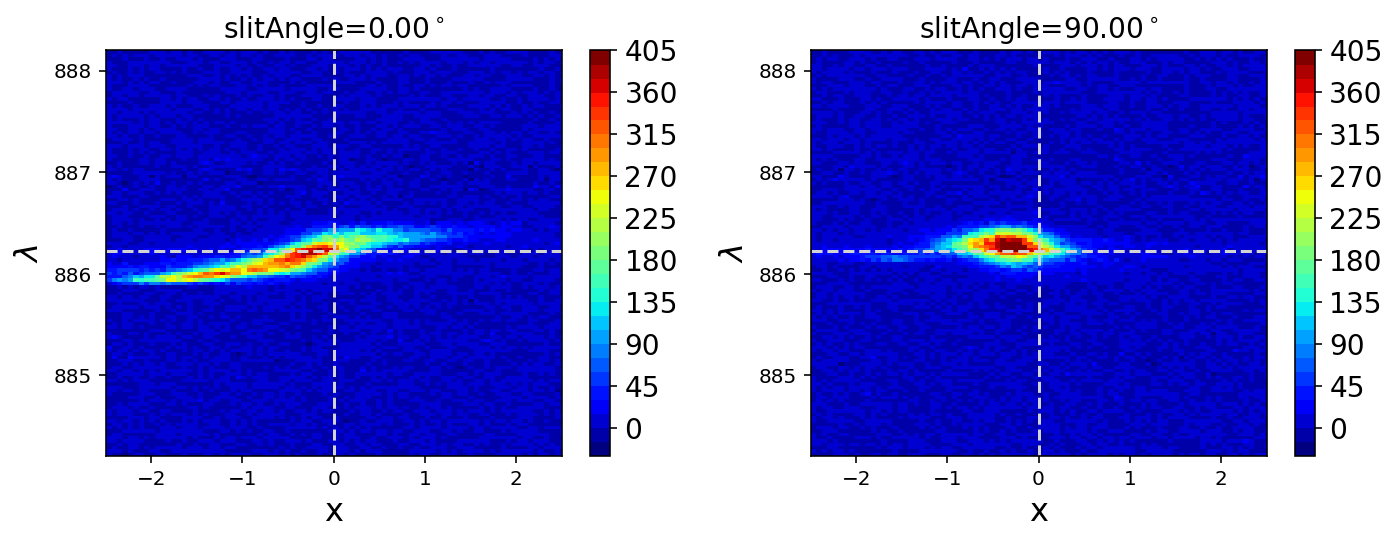

In [24]:
plot_specs(spectra, slitAngles=mock.Pars.fid['slitAngles'], spaceGrid=specCube.spaceGrid, lambdaGrid=specCube.lambdaGrid, xlim=[-2.5, 2.5])

# FiberSpec(SpecCube)

In [25]:
fiberObj = FiberSpec(specCube)
spec1D = fiberObj.get_spectrum(fiberR=1.5)

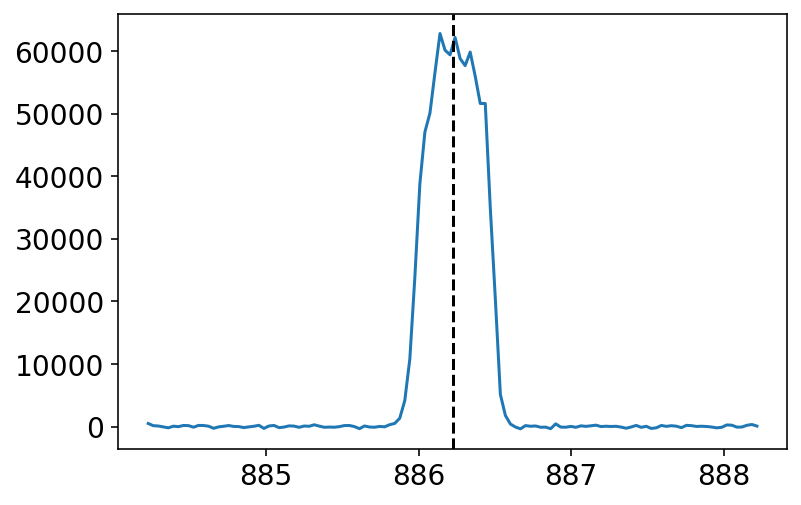

In [26]:
plt.plot(specCube.lambdaGrid, spec1D)
plt.axvline(x=mock.Pars.fid['lambda_cen'], color='k', ls='--')

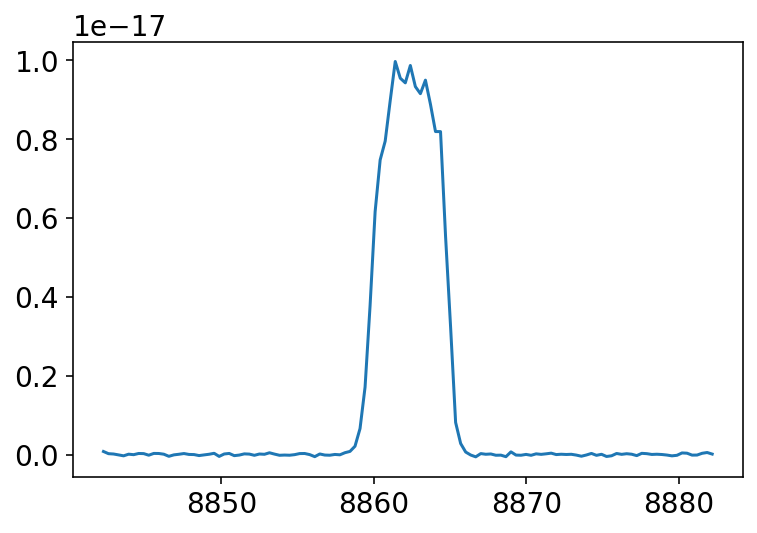

In [27]:
spec1D_SDSS = fiberObj.get_spectrum(fiberR=1.5, expTime=mock.Pars.fid['expTime'], area=mock.Pars.fid['area'])
plt.plot(specCube.lambdaGrid*10, spec1D_SDSS)

# SpecCube

# Sky

In [28]:
sky = Sky(pars)

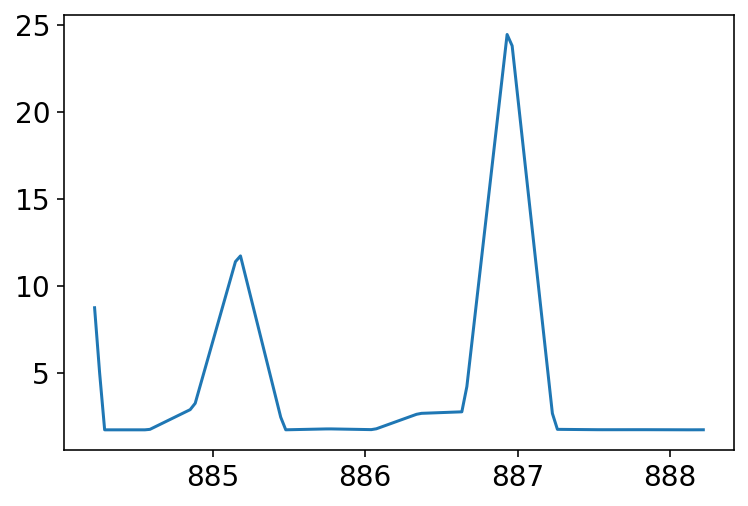

In [33]:
plot(sky.Pars.lambdaGrid, sky.spec1D)

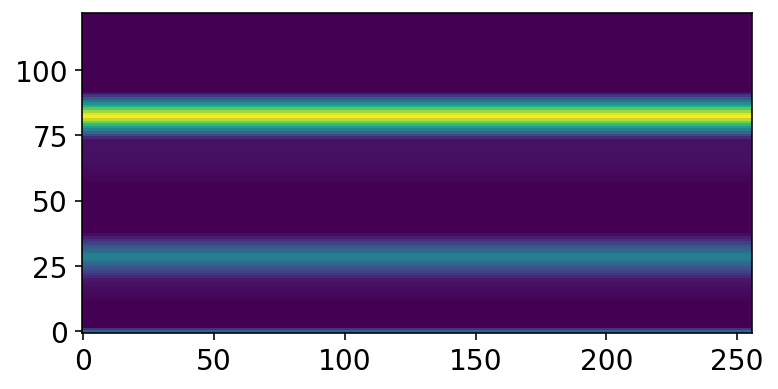

In [34]:
imshow(sky.spec2D.T, origin='lower')

In [31]:
sky.skyCube

In [32]:
sky.skyCube.array

array([[[8.7252517 , 4.98257606, 1.70932387, ..., 1.71145669,
         1.71226418, 1.71307168],
        [8.7252517 , 4.98257606, 1.70932387, ..., 1.71145669,
         1.71226418, 1.71307168],
        [8.7252517 , 4.98257606, 1.70932387, ..., 1.71145669,
         1.71226418, 1.71307168],
        ...,
        [8.7252517 , 4.98257606, 1.70932387, ..., 1.71145669,
         1.71226418, 1.71307168],
        [8.7252517 , 4.98257606, 1.70932387, ..., 1.71145669,
         1.71226418, 1.71307168],
        [8.7252517 , 4.98257606, 1.70932387, ..., 1.71145669,
         1.71226418, 1.71307168]],

       [[8.7252517 , 4.98257606, 1.70932387, ..., 1.71145669,
         1.71226418, 1.71307168],
        [8.7252517 , 4.98257606, 1.70932387, ..., 1.71145669,
         1.71226418, 1.71307168],
        [8.7252517 , 4.98257606, 1.70932387, ..., 1.71145669,
         1.71226418, 1.71307168],
        ...,
        [8.7252517 , 4.98257606, 1.70932387, ..., 1.71145669,
         1.71226418, 1.71307168],
        [8.7